In [3]:
from mira.openai import OpenAIClient
from mira.sources.sympy_ode.llm_util import (
    execute_template_model_from_sympy_odes,
    image_file_to_odes_str,
)
from IPython.display import Image

client = OpenAIClient()

In [28]:
# Equation image to MIRA model isn't deterministic, output is variable 

In [33]:
# BIOMODEL 955 

# Previous iterations did not execute straight out the box, this current one did 
# Edits made to get it to run 
# 1 - In the system of equations in "odes" list, uses "lambda" instead of SymPy lambda_ parameter symbol - Previously

# Correction edits 
# 1. Defines a phi parameter that's not used in the system of equations - Previously
# 2. Defines two lambda parameters - Currently


original_ode_str_biomd_955 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, I, D, A, R, T, H, E = sympy.symbols("S I D A R T H E", cls=sympy.Function)

# Define the parameters
alpha, beta, gamma, delta, epsilon, zeta, lambda_, eta, rho, theta, mu, nu, xi, sigma, tau, kappa, lambda_ = sympy.symbols("alpha beta gamma delta epsilon zeta lambda eta rho theta mu nu xi sigma tau kappa lambda_")

odes = [
    sympy.Eq(S(t).diff(t), - S(t) * (alpha * I(t) + beta * D(t) + gamma * A(t) + delta * R(t))),
    sympy.Eq(I(t).diff(t), S(t) * (alpha * I(t) + beta * D(t) + gamma * A(t) + delta * R(t)) - (epsilon + zeta + lambda_) * I(t)),
    sympy.Eq(D(t).diff(t), epsilon * I(t) - (eta + rho) * D(t)),
    sympy.Eq(A(t).diff(t), zeta * I(t) - (theta + mu + kappa) * A(t)),
    sympy.Eq(R(t).diff(t), eta * D(t) + theta * A(t) - (nu + xi) * R(t)),
    sympy.Eq(T(t).diff(t), mu * A(t) + nu * R(t) - (sigma + tau) * T(t)),
    sympy.Eq(H(t).diff(t), lambda_ * I(t) + rho * D(t) + kappa * A(t) + xi * R(t) + sigma * T(t)),
    sympy.Eq(E(t).diff(t), tau * T(t))
]
"""


updated_ode_str_biomd_955 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, I, D, A, R, T, H, E = sympy.symbols("S I D A R T H E", cls=sympy.Function)

# Define the parameters
alpha, beta, gamma, delta, epsilon, zeta, lambda_, eta, rho, theta, mu, nu, xi, sigma, tau, kappa = sympy.symbols("alpha beta gamma delta epsilon zeta lambda eta rho theta mu nu xi sigma tau kappa")

odes = [
    sympy.Eq(S(t).diff(t), - S(t) * (alpha * I(t) + beta * D(t) + gamma * A(t) + delta * R(t))),
    sympy.Eq(I(t).diff(t), S(t) * (alpha * I(t) + beta * D(t) + gamma * A(t) + delta * R(t)) - (epsilon + zeta + lambda_) * I(t)),
    sympy.Eq(D(t).diff(t), epsilon * I(t) - (eta + rho) * D(t)),
    sympy.Eq(A(t).diff(t), zeta * I(t) - (theta + mu + kappa) * A(t)),
    sympy.Eq(R(t).diff(t), eta * D(t) + theta * A(t) - (nu + xi) * R(t)),
    sympy.Eq(T(t).diff(t), mu * A(t) + nu * R(t) - (sigma + tau) * T(t)),
    sympy.Eq(H(t).diff(t), lambda_ * I(t) + rho * D(t) + kappa * A(t) + xi * R(t) + sigma * T(t)),
    sympy.Eq(E(t).diff(t), tau * T(t))
]
"""

tm_biomd_955 = execute_template_model_from_sympy_odes(
    ode_str=updated_ode_str_biomd_955, attempt_grounding=False, client=client
)

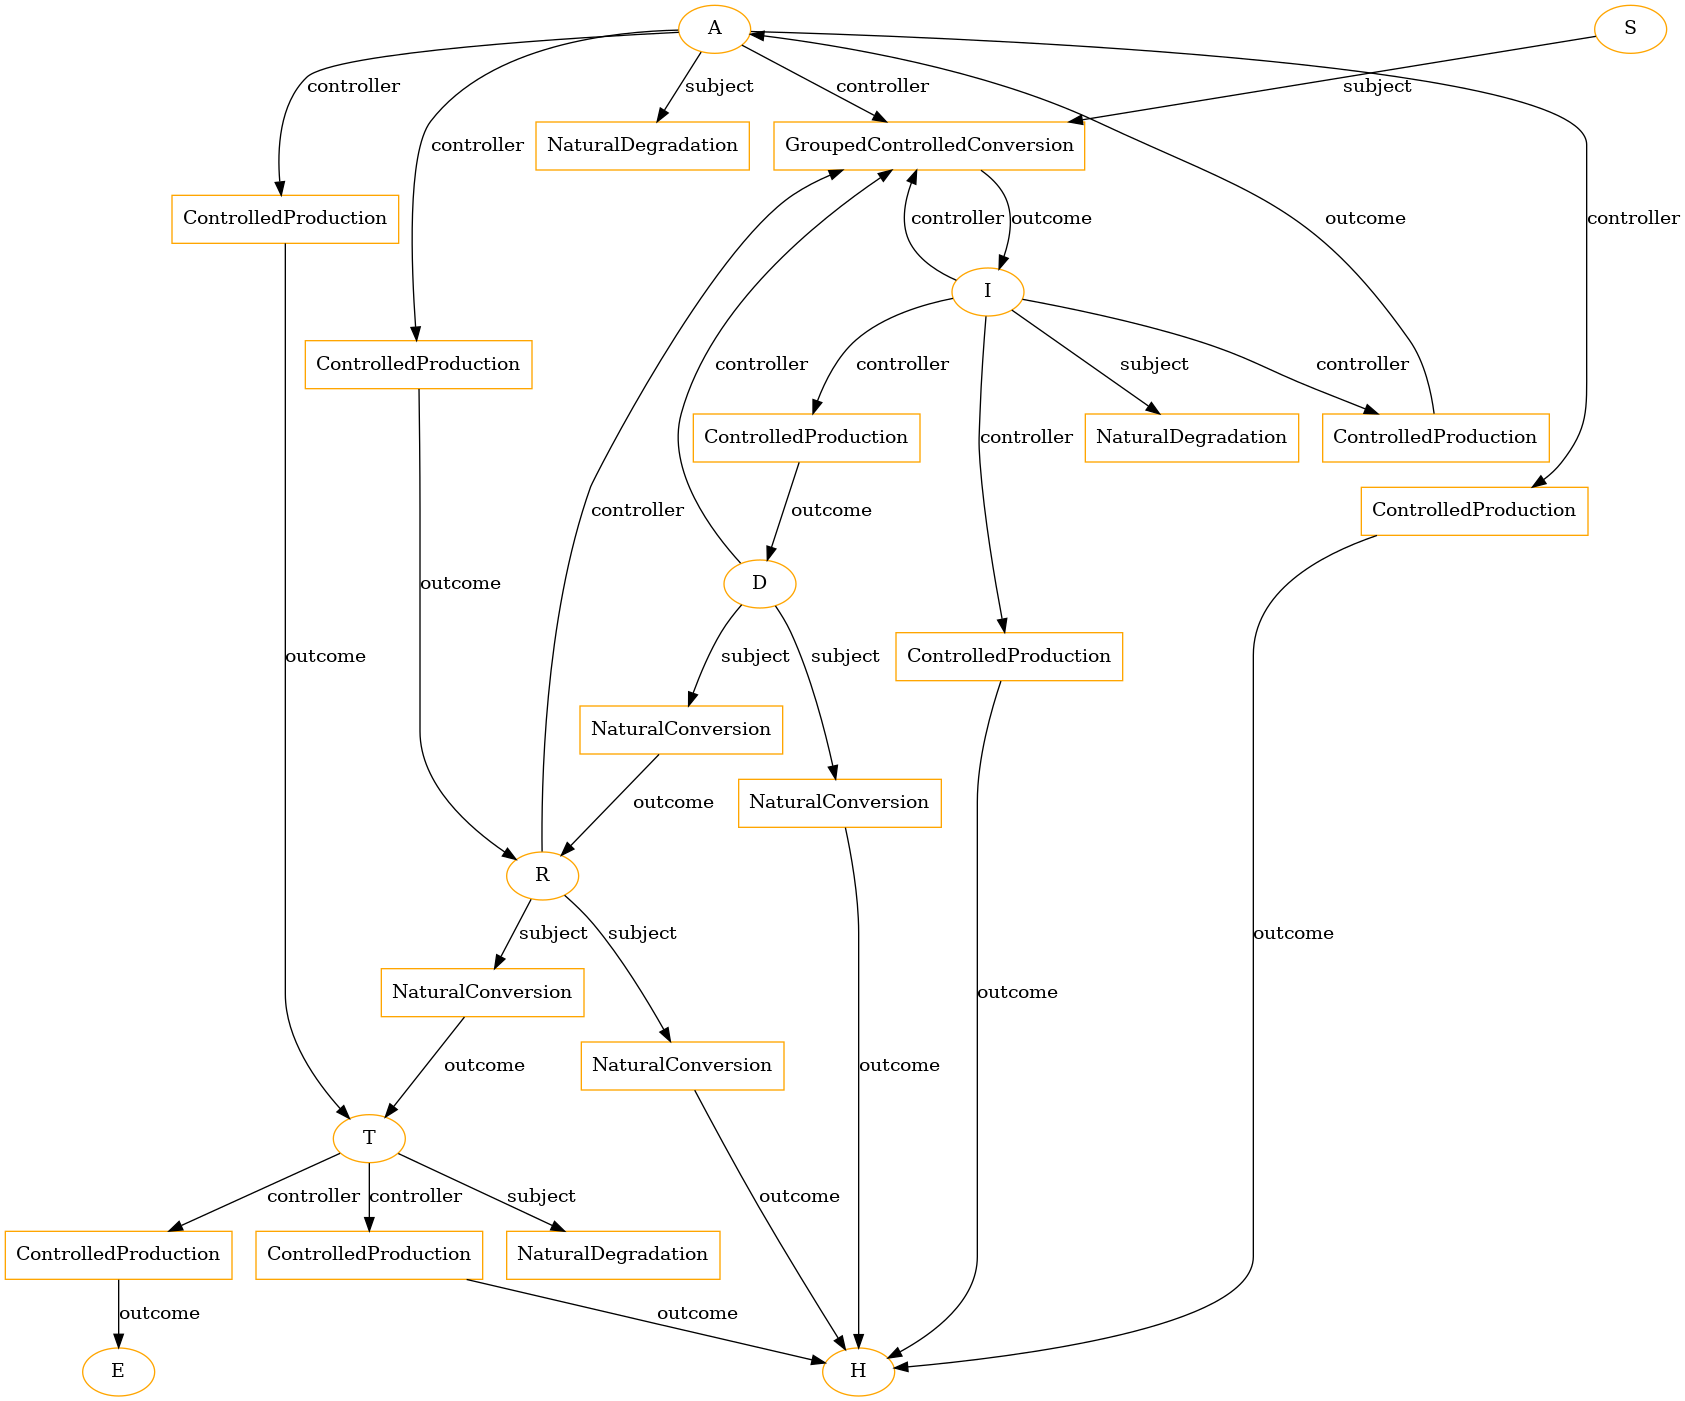

In [34]:
original_tm_biomd_955.draw_jupyter()

In [47]:
# BIOMODEL 956 

# Executed straight out the box 

# Correction edits 
# 1. Conflates the parameter N which represents population as a compartment. Remove N as a compartment and add it as a parameter
# and update the system of equations appropriately. 

original_ode_str_biomd_956 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, R, N = sympy.symbols("S E I R N", cls=sympy.Function)

# Define the parameters
beta, gamma, alpha = sympy.symbols("beta gamma alpha")

odes = [
    sympy.Eq(S(t).diff(t), - beta * S(t) * I(t) / N(t)),
    sympy.Eq(E(t).diff(t), beta * S(t) * I(t) / N(t) - alpha * E(t)),
    sympy.Eq(I(t).diff(t), alpha * E(t) - gamma * I(t)),
    sympy.Eq(R(t).diff(t), gamma * I(t))
]
"""


updated_ode_str_biomd_956 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, R = sympy.symbols("S E I R", cls=sympy.Function)

# Define the parameters
beta, gamma, alpha, N = sympy.symbols("beta gamma alpha N")

odes = [
    sympy.Eq(S(t).diff(t), - beta * S(t) * I(t) / N),
    sympy.Eq(E(t).diff(t), beta * S(t) * I(t) / N - alpha * E(t)),
    sympy.Eq(I(t).diff(t), alpha * E(t) - gamma * I(t)),
    sympy.Eq(R(t).diff(t), gamma * I(t))
]
"""

tm_biomd_956 = execute_template_model_from_sympy_odes(
    ode_str=updated_ode_str_biomd_956, attempt_grounding=False, client=client
)

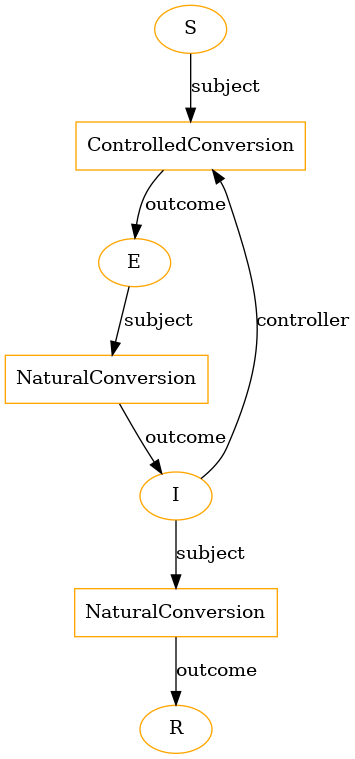

In [46]:
tm_biomd_956.draw_jupyter()

In [50]:
# BIOMODEL 957

# Executed straight out the box with no adjustments.
# The d parameter isn't defined in the Table 2 of the paper the model is derived from 
 
original_ode_str_957 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, R = sympy.symbols("S E I R", cls=sympy.Function)

# Define the parameters
beta, epsilon, rho, mu, d = sympy.symbols("beta epsilon rho mu d")

odes = [
    sympy.Eq(S(t).diff(t), - beta * S(t) * I(t)),
    sympy.Eq(E(t).diff(t), beta * S(t) * I(t) - epsilon * E(t)),
    sympy.Eq(I(t).diff(t), epsilon * E(t) - (rho + mu) * I(t)),
    sympy.Eq(R(t).diff(t), rho * I(t) - d * R(t))
]
"""

tm_biomd_957 = execute_template_model_from_sympy_odes(
    ode_str=original_ode_str_957, attempt_grounding=False, client=client
)

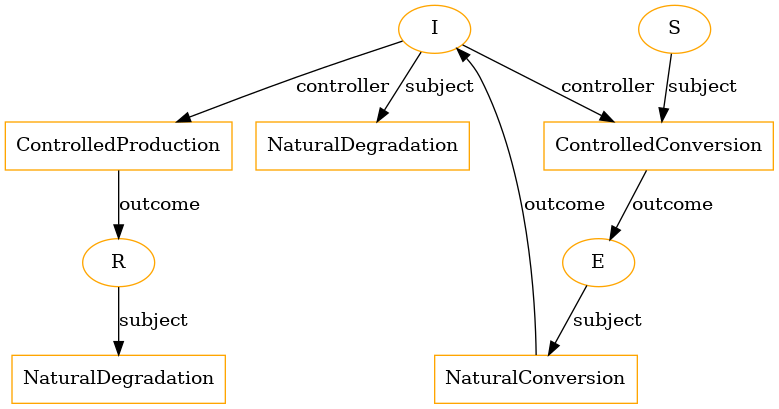

In [51]:
tm_biomd_957.draw_jupyter()

In [63]:
# BIOMODEL 958

# Didn't execute right out the box 
# Edits to get it to run
# 1. Missing parameter N (total population) 
# 2. Conflates kappa parameter with rho when defining parameters, but correctly uses rho in system of equations. Have to add rho1 and rho2
# as parameters
# 3. Remove erroneous usage of kappa1 and kappa2 parameters in system of equations

# Correctness edits
# 1. Compartment P is not divided by N in the equation for compartment S
# 2. Missing beta_prime * P(t)/N * S(t) term in equation for compartment E
# 3. Missing -rho2 term in parenthesis in the equation for compartment A
# 4. Missing gamma_r as coefficient for H(t) in equation for compartment R

original_ode_str_958 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, P, A, H, R, F = sympy.symbols("S E I P A H R F", cls=sympy.Function)

# Define the parameters
beta, l, b, beta_prime, kappa1, gamma_alpha, delta_i, kappa2, gamma_i, delta_p, gamma_r, delta_h = sympy.symbols("beta l b beta_prime kappa1 gamma_alpha delta_i kappa2 gamma_i delta_p gamma_r delta_h")

odes = [
    sympy.Eq(S(t).diff(t), -beta * I(t) / N * S(t) - l * beta * H(t) / N * S(t) - beta_prime * P(t) * S(t)),
    sympy.Eq(E(t).diff(t), beta * I(t) / N * S(t) + l * beta * H(t) / N * S(t) - kappa1 * E(t)),
    sympy.Eq(I(t).diff(t), kappa1 * rho1 * E(t) - (gamma_alpha + gamma_i) * I(t) - delta_i * I(t)),
    sympy.Eq(P(t).diff(t), kappa2 * rho2 * E(t) - (gamma_alpha + gamma_i) * P(t) - delta_p * P(t)),
    sympy.Eq(A(t).diff(t), kappa * (1 - rho1) * E(t)),
    sympy.Eq(H(t).diff(t), gamma_alpha * (I(t) + P(t)) - gamma_r * H(t) - delta_h * H(t)),
    sympy.Eq(R(t).diff(t), gamma_i * (I(t) + P(t)) * H(t)),
    sympy.Eq(F(t).diff(t), delta_i * I(t) + delta_p * P(t) + delta_h * H(t))
]
"""

updated_ode_str_958 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, P, A, H, R, F = sympy.symbols("S E I P A H R F", cls=sympy.Function)

# Define the parameters
N, beta, l, b, beta_prime, kappa, gamma_alpha, delta_i, kappa2, gamma_i, delta_p, gamma_r, delta_h, rho1, rho2 = sympy.symbols("N beta l b beta_prime kappa gamma_alpha delta_i kappa2 gamma_i delta_p gamma_r delta_h rho1 rho2")

odes = [
    sympy.Eq(S(t).diff(t), -beta * I(t) / N * S(t) - l * beta * H(t) / N * S(t) - beta_prime * P(t) / N * S(t)),
    sympy.Eq(E(t).diff(t), beta * I(t) / N * S(t) + l * beta * H(t) / N * S(t) + beta_prime * P(t)/N * S(t) - kappa * E(t)),
    sympy.Eq(I(t).diff(t), kappa * rho1 * E(t) - (gamma_alpha + gamma_i) * I(t) - delta_i * I(t)),
    sympy.Eq(P(t).diff(t), kappa * rho2 * E(t) - (gamma_alpha + gamma_i) * P(t) - delta_p * P(t)),
    sympy.Eq(A(t).diff(t), kappa * (1 - rho1 - rho2) * E(t)),
    sympy.Eq(H(t).diff(t), gamma_alpha * (I(t) + P(t)) - gamma_r * H(t) - delta_h * H(t)),
    sympy.Eq(R(t).diff(t), gamma_i * (I(t) + P(t)) + gamma_r * H(t)),
    sympy.Eq(F(t).diff(t), delta_i * I(t) + delta_p * P(t) + delta_h * H(t))
]
"""


tm_biomd_958 = execute_template_model_from_sympy_odes(
    ode_str=updated_ode_str_958, attempt_grounding=False, client=client
)

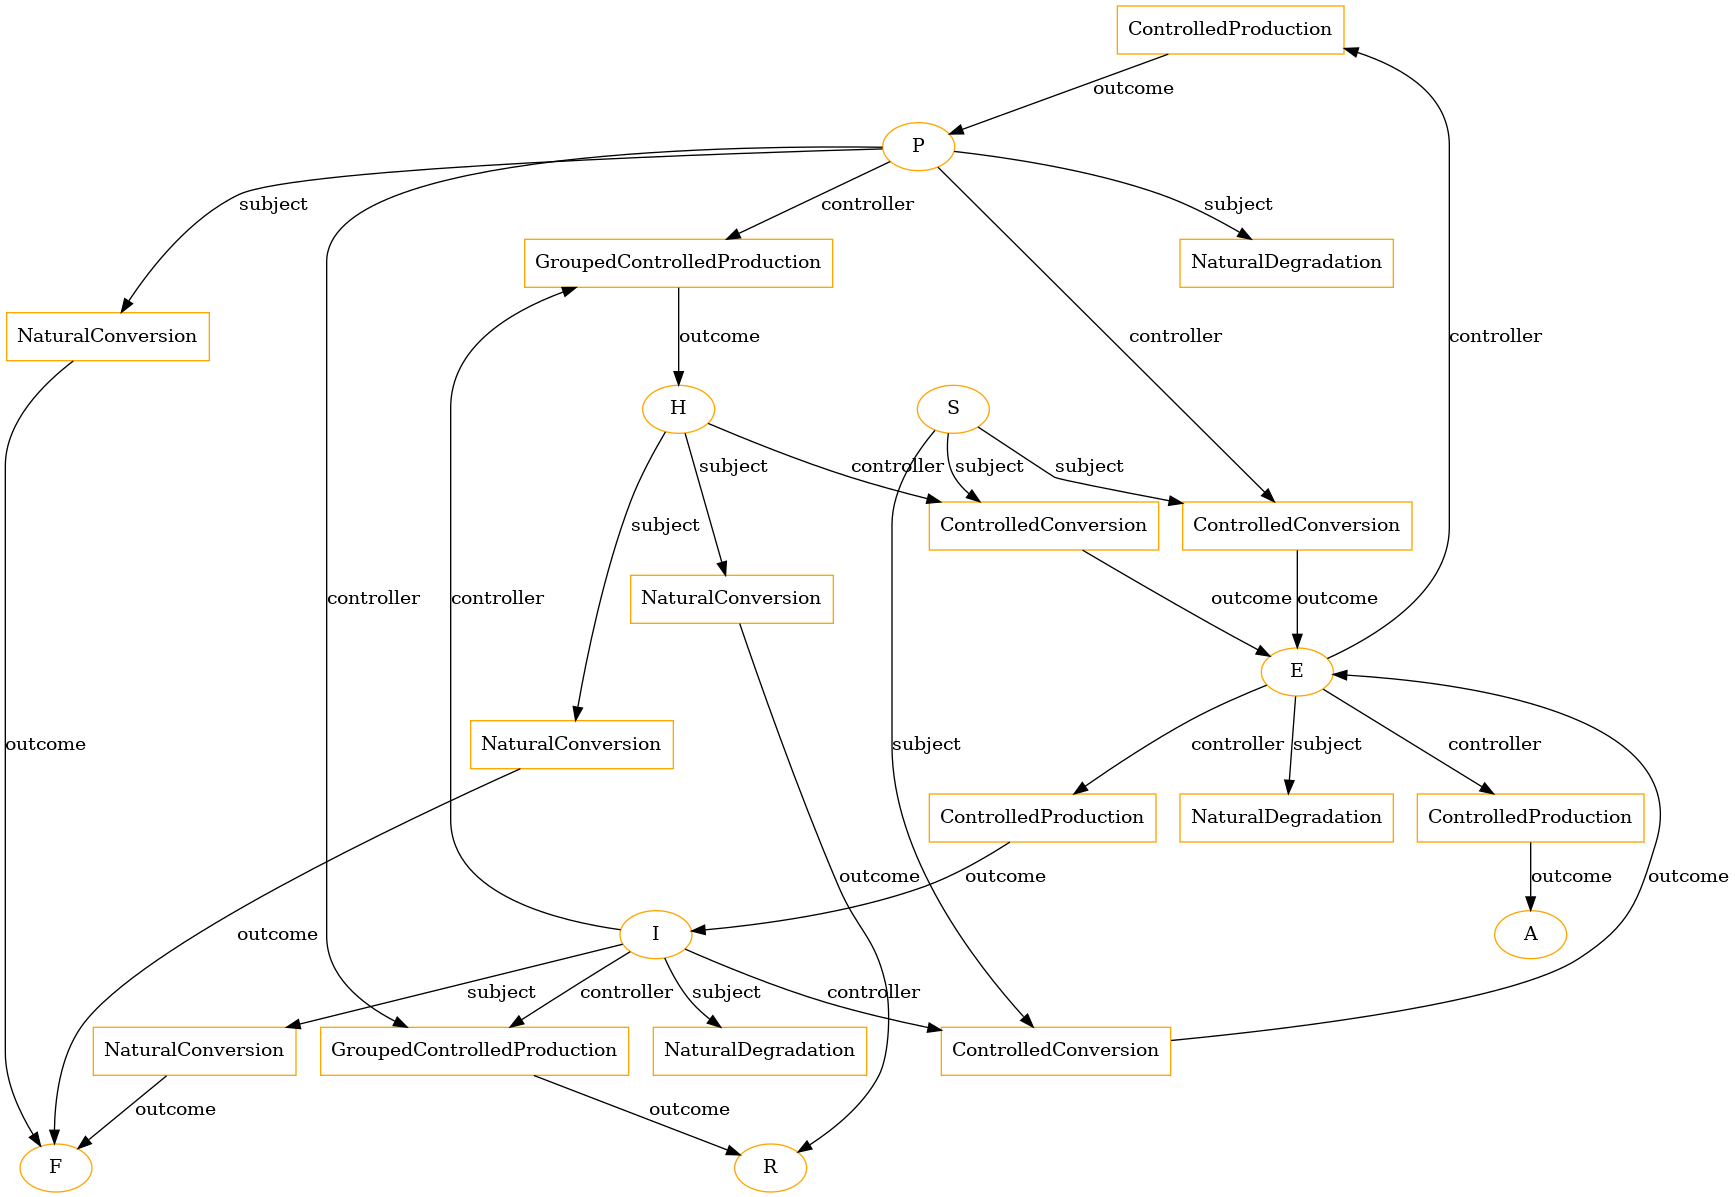

In [64]:
tm_biomd_958.draw_jupyter()

In [71]:
# BIOMODEL 960 

# Does not run out of the box 

# Edits to make it run
# 1. Does not define gamma_r parameter used in system of equations
# 2. Uses undefined gamma_H parameter in system of equations
# 3. Does not define delta_A parameter used in system of equations

# Correctness edits
# 1. Does not use l, l_a parameters used in the equation for compartment S. Incorrectly replaces them with kappa and delta_I respectively. 
# 2. Does not use l, l_a parameters used in equation for compartment E. Incorrectly replaces them with kappa and delta_I respectively. 
# 3. Incorrectly defines an extra parameter "mu_A" and uses it when "mu" should be used in equations for compartment A.
# 4. Incorrectly defines an extra parameter "mu_A" and uses it when "mu" should be used in equations for compartment D.
# 5. Missing delta_A multiplier for mu*A(t) term in equation for compartment D.  
original_ode_str_960 = """
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, A, H, R, D = sympy.symbols("S E I A H R D", cls=sympy.Function)

# Define the parameters
beta, kappa, gamma_a, gamma_I, delta_H, delta_I, mu_A, mu, rho, N = sympy.symbols("beta kappa gamma_a gamma_I delta_H delta_I mu_A mu rho N")

odes = [
    sympy.Eq(S(t).diff(t), - S(t) * beta * (I(t) + kappa * A(t) + delta_I * H(t)) / N),
    sympy.Eq(E(t).diff(t), S(t) * beta * (I(t) + kappa * A(t) + delta_I * H(t)) / N - kappa * E(t)),
    sympy.Eq(I(t).diff(t), kappa * rho * E(t) - (gamma_a + gamma_I + delta_I) * I(t)),
    sympy.Eq(A(t).diff(t), kappa * (1 - rho) * E(t) - mu_A * A(t)),
    sympy.Eq(H(t).diff(t), gamma_a * I(t) - (gamma_r + delta_H) * H(t)),
    sympy.Eq(R(t).diff(t), gamma_I * I(t) + gamma_H * H(t) + mu * (1 - delta_A) * A(t)),
    sympy.Eq(D(t).diff(t), delta_H * H(t) + delta_I * I(t) + mu_A * A(t))
]
"""

updated_ode_str_960 = """
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, A, H, R, D = sympy.symbols("S E I A H R D", cls=sympy.Function)

# Define the parameters
l, l_a, beta, kappa, gamma_a, gamma_I, gamma_r, delta_H, delta_I, delta_A, mu_A, mu, rho, N = sympy.symbols("l l_a beta kappa gamma_a gamma_I gamma_r delta_H delta_I delta_A mu_A mu rho N")

odes = [
    sympy.Eq(S(t).diff(t), - S(t) * beta * (I(t) + l_a * A(t) + l * H(t)) / N),
    sympy.Eq(E(t).diff(t), S(t) * beta * (I(t) + l_a * A(t) + l * H(t)) / N - kappa * E(t)),
    sympy.Eq(I(t).diff(t), kappa * rho * E(t) - (gamma_a + gamma_I + delta_I) * I(t)),
    sympy.Eq(A(t).diff(t), kappa * (1 - rho) * E(t) - mu * A(t)),
    sympy.Eq(H(t).diff(t), gamma_a * I(t) - (gamma_r + delta_H) * H(t)),
    sympy.Eq(R(t).diff(t), gamma_I * I(t) + gamma_r * H(t) + mu * (1 - delta_A) * A(t)),
    sympy.Eq(D(t).diff(t), delta_H * H(t) + delta_I * I(t) + mu * delta_A * A(t))
]
"""

tm_biomd_960 = execute_template_model_from_sympy_odes(
    ode_str=updated_ode_str_960, attempt_grounding=False, client=client
)


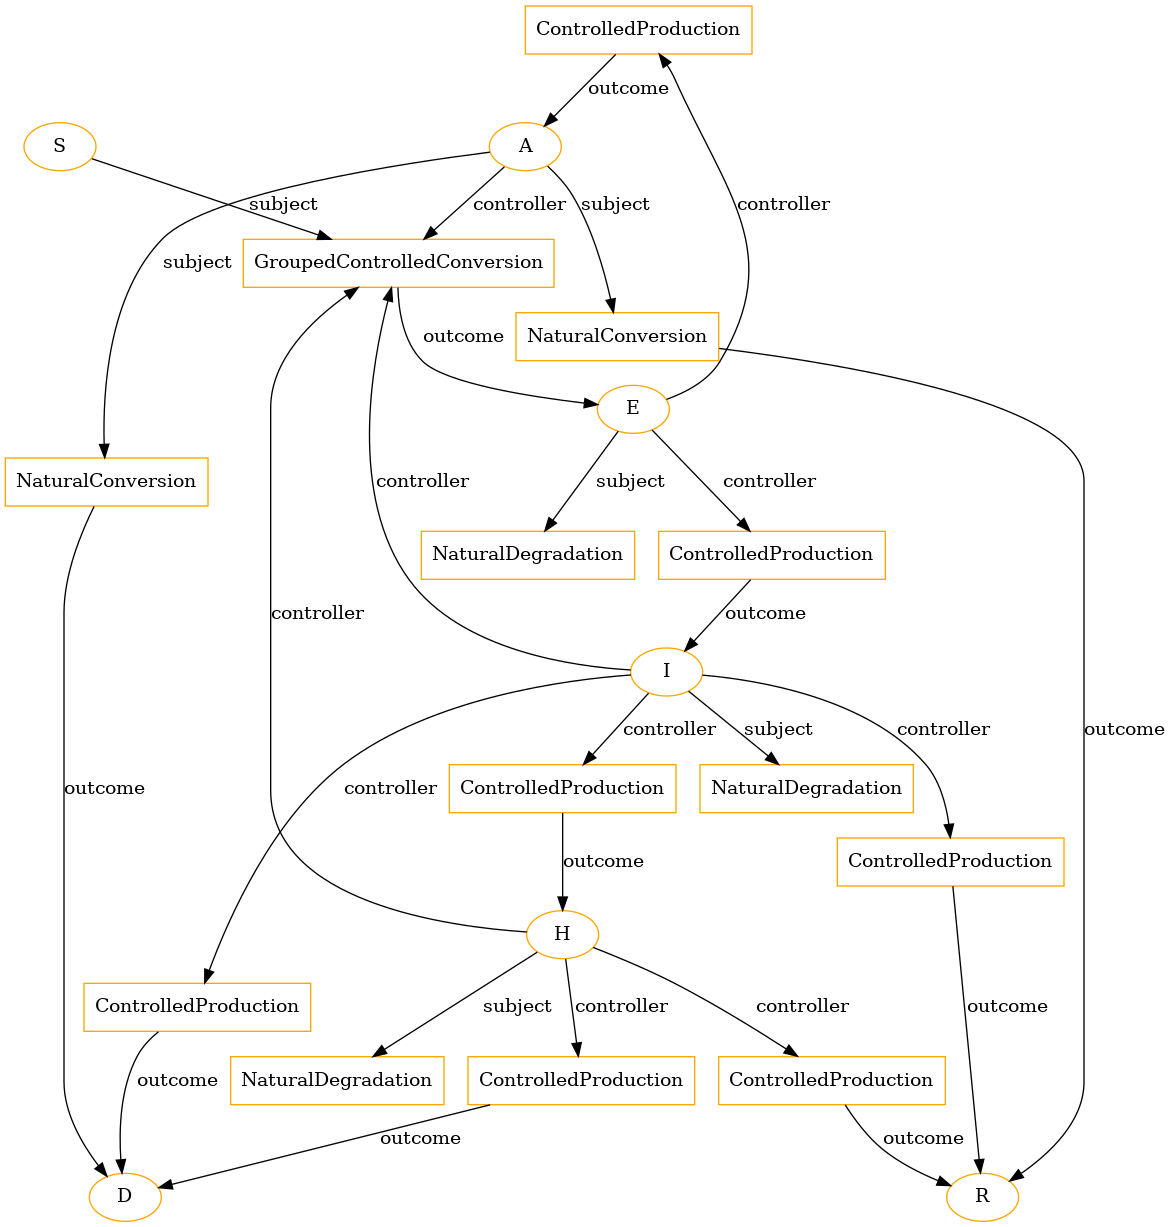

In [72]:
tm_biomd_960.draw_jupyter()